In [1]:
import matplotlib.pyplot as plt
import numpy as np

# CPU vs BLAS

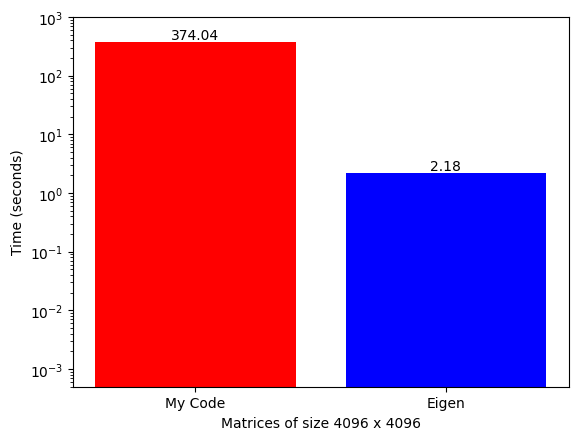

In [38]:
categories = ['My Code', 'Eigen']
values = [374.04, 2.18]

# Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(categories, values, color=['r', 'b'])
plt.semilogy()
plt.ylim(5e-4, 1e+3)

# Add labels and title
ax.set_xlabel('Matrices of size 4096 x 4096')
ax.set_ylabel('Time (seconds)')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

plt.show()

# CPU vs BLAS vs cuBLAS

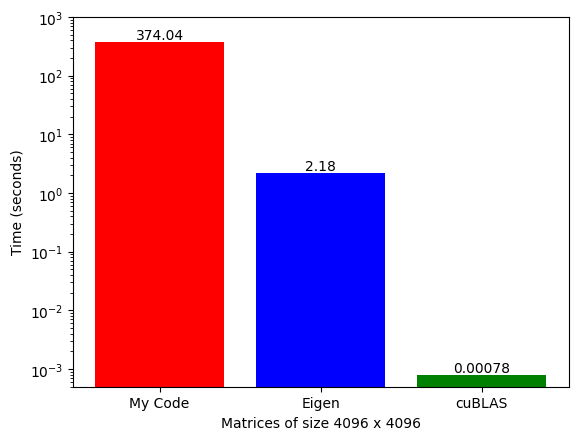

In [37]:
categories = ['My Code', 'Eigen', 'cuBLAS']
values = [374.04, 2.18, 0.00078]

# Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(categories, values, color=['r', 'b', 'g'])
plt.semilogy()
plt.ylim(5e-4, 1e+3)

# Add labels and title
ax.set_xlabel('Matrices of size 4096 x 4096')
ax.set_ylabel('Time (seconds)')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

plt.show()

# Naive CPU

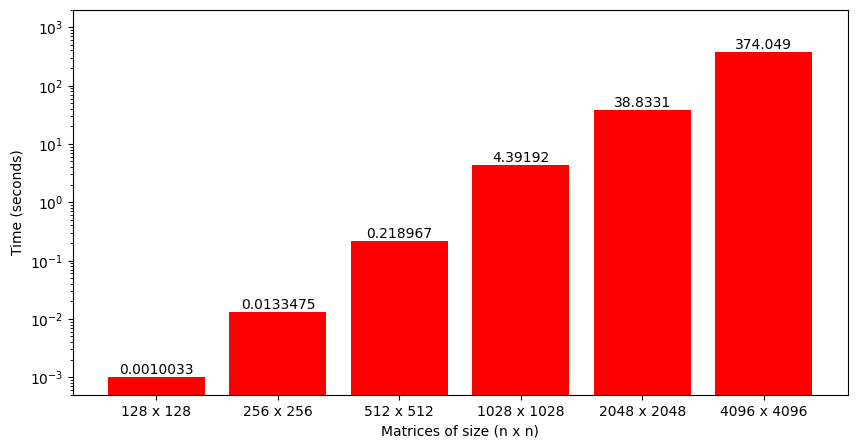

In [26]:
mat_sizes = ["128 x 128", "256 x 256", "512 x 512", "1028 x 1028", "2048 x 2048", "4096 x 4096"]
cpu_time = [0.0010033, 0.0133475, 0.218967, 4.39192, 38.8331, 374.049]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(mat_sizes, cpu_time, color='r')
plt.semilogy()
plt.ylim(5e-4, 2e+3)

# Add labels and title
ax.set_xlabel('Matrices of size (n x n)')
ax.set_ylabel('Time (seconds)')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

plt.show()

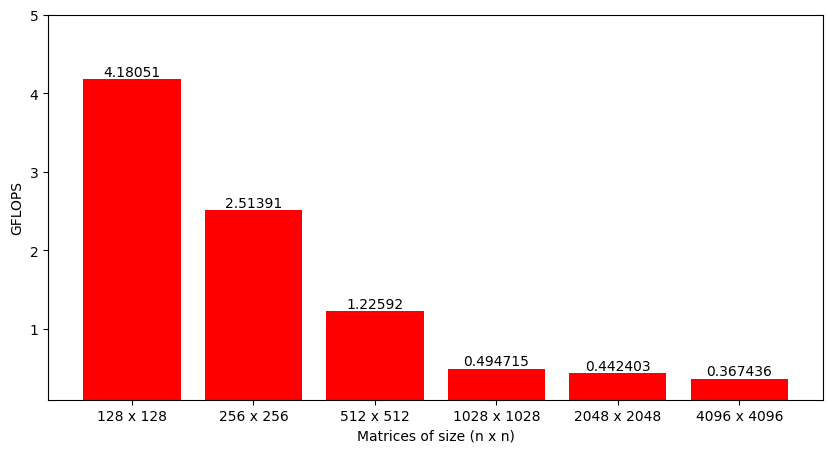

In [25]:
mat_sizes = ["128 x 128", "256 x 256", "512 x 512", "1028 x 1028", "2048 x 2048", "4096 x 4096"]
cpu_time = [4.18051, 2.51391, 1.22592, .494715, 0.442403, 0.367436]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(mat_sizes, cpu_time, color='r')
# plt.semilogy()
plt.ylim(1e-1, 0.5e+1)

# Add labels and title
ax.set_xlabel('Matrices of size (n x n)')
ax.set_ylabel('GFLOPS')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

plt.show()

# cuBLAS

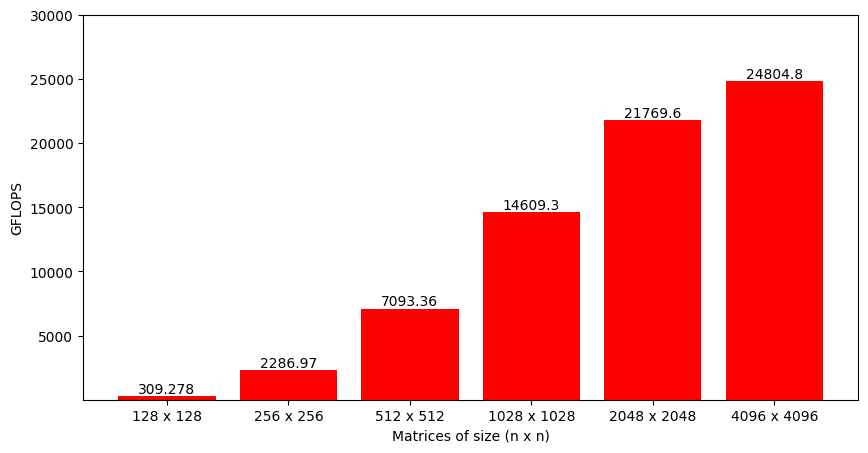

In [7]:
mat_sizes = ["128 x 128", "256 x 256", "512 x 512", "1028 x 1028", "2048 x 2048", "4096 x 4096"]
cpu_time = [309.278, 2286.97, 7093.36, 14609.3, 21769.6, 24804.8]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(mat_sizes, cpu_time, color='r')
# plt.semilogy()
plt.ylim(1e-1, 3e+4)

# Add labels and title
ax.set_xlabel('Matrices of size (n x n)')
ax.set_ylabel('GFLOPS')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

plt.show()

# Naive GPU vs cuBLAS

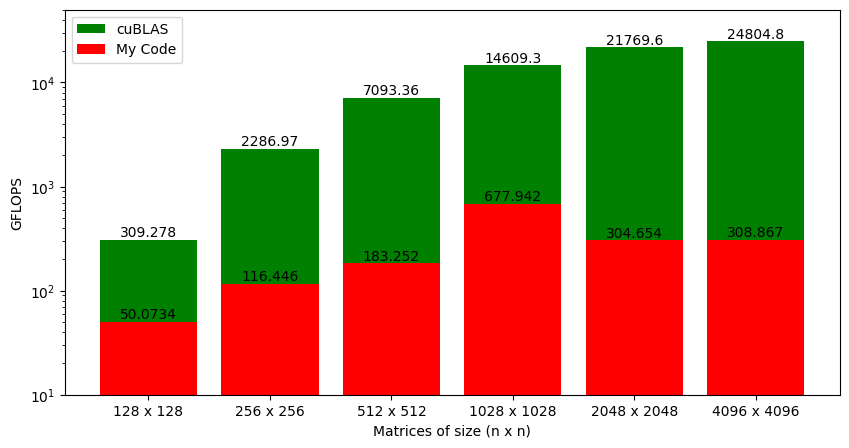

In [21]:
mat_sizes = ["128 x 128", "256 x 256", "512 x 512", "1028 x 1028", "2048 x 2048", "4096 x 4096"]
cublas_gflops = [309.278, 2286.97, 7093.36, 14609.3, 21769.6, 24804.8]
naive_gflops = [50.0734, 116.446, 183.252, 677.942, 304.654, 308.867]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 5))
bars_1 = ax.bar(mat_sizes, cublas_gflops, color='g', label="cuBLAS")
bars_2 = ax.bar(mat_sizes, naive_gflops, color='r', label="My Code")
plt.semilogy()
plt.ylim(1e+1, 5e+4)

# Add labels and title
ax.set_xlabel('Matrices of size (n x n)')
ax.set_ylabel('GFLOPS')
plt.legend()

# Add value labels on top of each bar
for bar in bars_1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')
for bar in bars_2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

plt.show()

In [23]:
np.array(naive_gflops) / np.array(cublas_gflops) * 100

array([16.19041768,  5.09171524,  2.58343014,  4.64048243,  1.39944694,
        1.24519045])

# Coalesced GPU vs cuBLAS

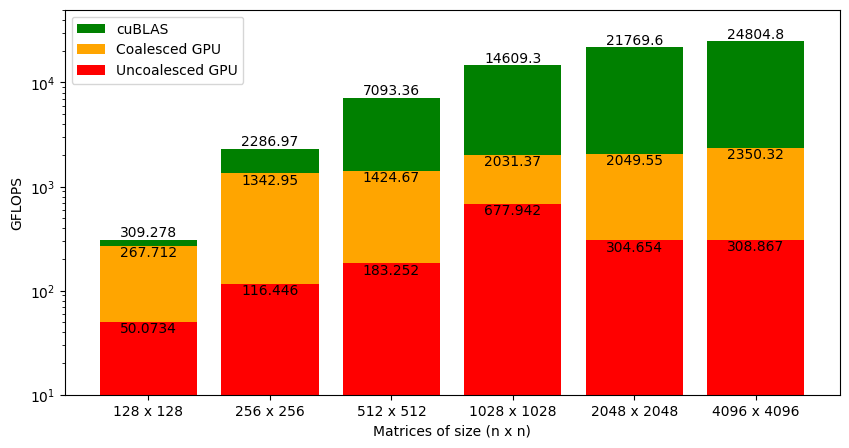

In [8]:
mat_sizes = ["128 x 128", "256 x 256", "512 x 512", "1028 x 1028", "2048 x 2048", "4096 x 4096"]
cublas_gflops = [309.278, 2286.97, 7093.36, 14609.3, 21769.6, 24804.8]
naive_gflops = [50.0734, 116.446, 183.252, 677.942, 304.654, 308.867]
coalesced_gflops = [267.712, 1342.95, 1424.67, 2031.37, 2049.55, 2350.32]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 5))
bars_1 = ax.bar(mat_sizes, cublas_gflops, color='g', label="cuBLAS")
bars_3 = ax.bar(mat_sizes, coalesced_gflops, color='orange', label="Coalesced GPU")
bars_2 = ax.bar(mat_sizes, naive_gflops, color='r', label="Uncoalesced GPU")
plt.semilogy()
plt.ylim(1e+1, 5e+4)

# Add labels and title
ax.set_xlabel('Matrices of size (n x n)')
ax.set_ylabel('GFLOPS')
plt.legend()

# Add value labels on top of each bar
for bar in bars_1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')
for bar in bars_2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='top')
for bar in bars_3:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='top')


plt.show()

In [9]:
np.array(coalesced_gflops) / np.array(cublas_gflops) * 100

array([86.56031144, 58.72180221, 20.08455795, 13.90463609,  9.41473431,
        9.47526285])